<a href="https://colab.research.google.com/github/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Oxford_End_to_End_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial-Intelligence-Cloud-and-Edge-Implementations: 
# End-to-End Machine Learning Problem: Regression

* The aim of this notebook is to introduce you to the core concepts in developing and building a machine learning model, including:

  * An overview of Machine Learning; 
  * An overview of the the Machine Learning workflow; 
  * An introduction, through explanations and code, of the key machine learning libraries in `python`; and
  * Familiariry with the `collaboratory` environment 

  

## CONCEPT 1: What is Machine Learning?

### 1.1 Aims:
  * To introduce the concept of machine learning 
  * To introduce the different types of machine learning
  * To suggest further reading in order to explore this concept in more detail

### Explanation: 

**Machine Learning**
* From ['Python Data Science Handbook'](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlass:

* *Machine learning is often categorized as a subfield of artificial intelligence, but I find that categorization can often be misleading at first brush. The study of machine learning certainly arose from research in this context, but in the data science application of machine learning methods, it’s more helpful to think of **machine learning as a means of building models of data**.*


* *Fundamentally, **machine learning involves building mathematical models to help understand data**. “Learning” enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be “learning” from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.*




**Different types of Machine Learning**

* *Supervised learning* is about modeling the relationship between features of data and a label associated with the data. Once this model is determined, it can be used to apply labels to new, unknown data. 
* Supervised learning can either be a *classification* task (where our labels are in discrete categories) or *regression* task (where our labels are continuous quantities). 
* *Unsupervised learning* models the features of a dataset without reference to any label. These models include tasks such as clustering and dimensionality reduction. We can use unsupervised learning technqiues to preprocess data prior to running supervised learning models. 
* *Semi-supervised learning* can also be used when we only have incomplete labels for our data.
* *Deep learning* can be thought of as a way of implementimg  *supervised*, *unsupervised* and *semi-supervised* learning using models that have more layers (we will come to Deep Learning later in the module)

### 1.2 Next Steps:

* For a good introduction, we recommend ['Python Data Science Handbook'](https://jakevdp.github.io/PythonDataScienceHandbook/), which available free at the link. 

* For a more detailed overview, we suggest Chapter 2 of *Introduction to Statistical Learning* (also free [here](http://www-bcf.usc.edu/~gareth/ISL/)).

## CONCEPT 2: Machine Learning Workflow
 

![alt text](https://github.com/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Screenshot%202019-11-11%20at%2022.01.44.png?raw=true)


### 2.4 Next Steps:
* There are various approaches to machine learning workflow, though all will include the areas covered above. 
* Good discussions of machine learning workflow are available. See this [blog](https://www.kdnuggets.com/2018/05/general-approaches-machine-learning-process.html) for an example. 

## CONCEPT 3: Key `python` libraries 
**Aims:**
* To introduce you to the key machine learning libraries
* To import all the libraries we will need 

**Explanation:**
* We will use the following `python` libraries, which you will encounter frequently for data analysis and machine learning tasks: 
 *  `numpy`, which provides vectorised arrays, and maths, algebra functionality;
 * `pandas`, which provides data structures and data analysis tools;
 * `matplotlib`, which provides highly customisable plotting functionality (and we also use `seaborn`, built on top of `matplotlib`, which is less customisable but can generate charts with less code); and, 
 * `scikit-learn`, which provides models and tools for most machine learning algorithms

In [1]:
# these are import statements 
# by convention, the libraries are imported as a shorthand that we will refer to 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# rather than importing the whole sklearn library, we will import certain modules 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

**Next Steps:**
* We have developed more focussed notebooks for each of the main libraries, and they are available as part of the course.

## SECTION 1: Exploratory Data Analysis



### 1.1 Aims:
* To take you through the first part of a machine learning problem following the steps introduced earlier 
* To explain at a high level the different steps, and the code used to implement them

### 1.2 Machine Learning Workflow - EDA

![alt text](https://github.com/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Screenshot%202019-11-11%20at%2022.02.10.png?raw=true)

#### 1. Define the Problem Statement
* We will define the problem(s) that we are trying to solve given the data available to us
* Note that steps 1 and 2 can be iterative, in that we may only know the problem we are trying to solve once we have analyzed the data. 

#### 2. Analyze and Preprocess Data
* We will `analyze` our data to ensure we understand what information it contains, and whether some parts of the data are more relevant than others 
* We will also `preprocess` the data, so that any missing values are treated appropriately. We might `normalize` the data and turn `categorical` data into something that can be processed by our model.

### Step 1: Define the Problem Statement

* For our first end to end problem, we will use a dataset that is provided as part of the `sci-kit learn` library, the Boston Houses dataset. We can load this dataset easily and see a general description of what it contains.

In [2]:
# we load the dataset and save it as the variable boston
boston = load_boston()

# if we want to know what sort of detail is provided with this dataset, we can call .keys()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# the info at the .DESCR key will tell us more 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

* There is a lot of information to inform our problem statement. We have been given a `data` and `target` set of values and told that `MEDV` (median value) is usually used as the target variable. 
* We can therefore say that the problem statement is *to predict the median value of a home given a set number of features of that home*. 
* We have 13 other features. We will use those 13 features and accompanying target variable - the median value of the home - to train a model using seen or training data. We will then feed our trained model the 13 features from unseen or test data *without* passing in the target variable information. Our model will predict what it thinks is the median value and we will compare that prediction to the actual answer to assess how well our model performs. 
* We can also see that our data set contains 506 records. It has no missing values, which is unusual but makes our job of `preprocessing` easier.


### Step 2: Analyse and Preprocess data

#### Analyze the Data
* We will use `pandas` and `matplotlib` to do some basic `exploratory data analysis`
* This will include getting a feel for the overall dataset so that we understand what sorts of values it contains
* We will compute summary statistics and look at the distributions of each feature
* We can start to determine what are the most important features, where there might be `outliers` and whether we need to `normalize` the data.

In [4]:
# we can use pandas to create a dataframe, which is basically a way of storing and operating on tabular data 
# here we pass in both the data and the column names as variables
boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)

In [5]:
# we will also drop one of the features - B 
boston_X = boston_X.drop(columns='B')

In [6]:
# we can then look at the top of the dataframe to see the sort of values it contains
boston_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [7]:
# pandas has a lot of functionality to assist with exploratory data analysis
# .describe() provide summary statistics on all numeric columns
print(boston_X.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063  
std     28.148861    2.105710 

In [8]:
# we can also see the shape of the data
print(boston_X.shape)

(506, 12)


* For each feature, we can see the `count`, or number of data entries, the `mean` value, and the `standard deviation`, `min`, `max` and `quartile` values. 
* We can see that the range of values for each feature differs quite a lot, so we can start to think about whether to apply normalization to the data. 
* We can also see that the `CHAS` faeture is either a `(1,0)` value. If we look back at our description, we can see that this is an example of a `categorical` variable. These are values used to describe non-numeric data. In this case,  a `1` indicates the house borders near the river, and a `0` that it doesn't.

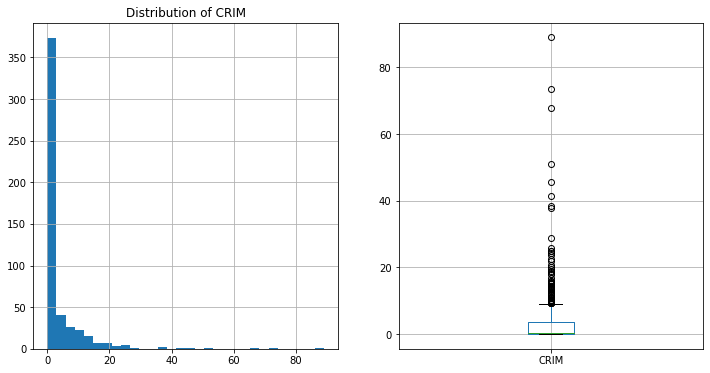

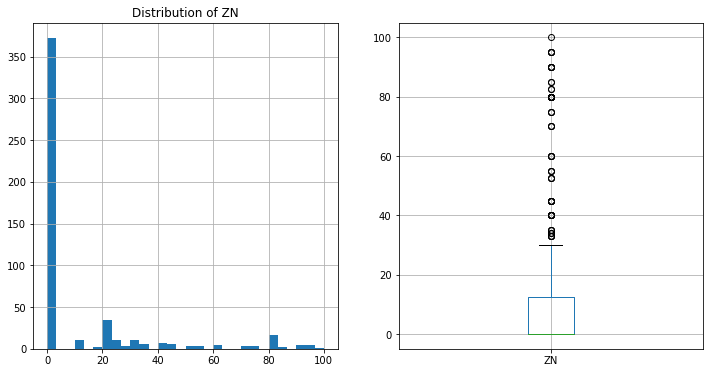

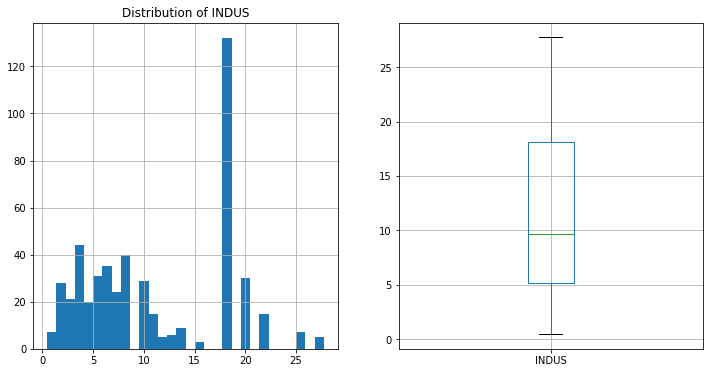

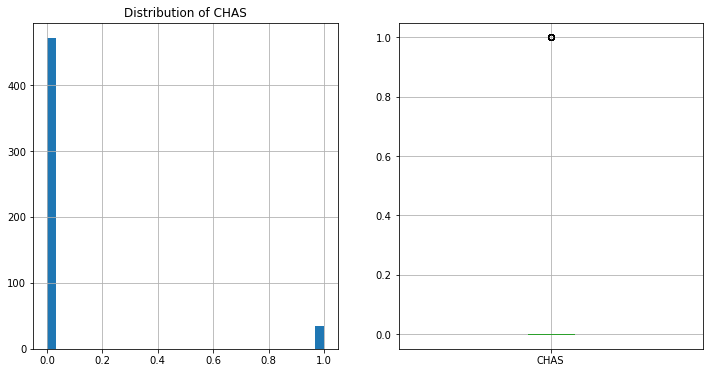

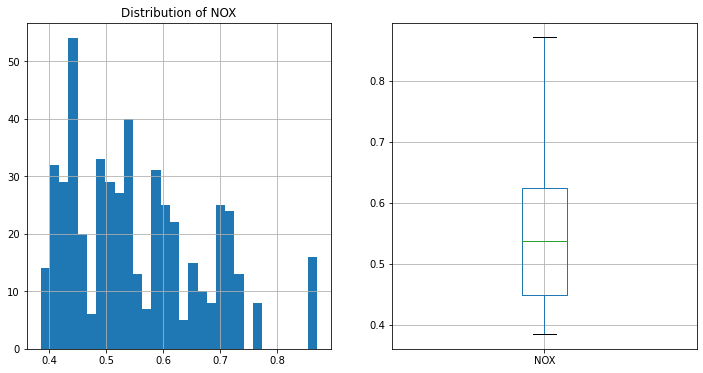

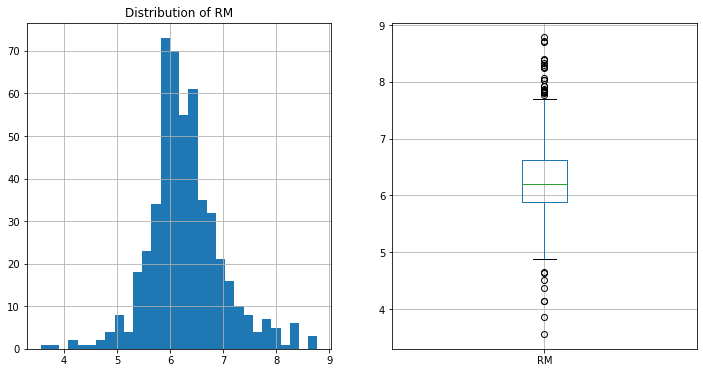

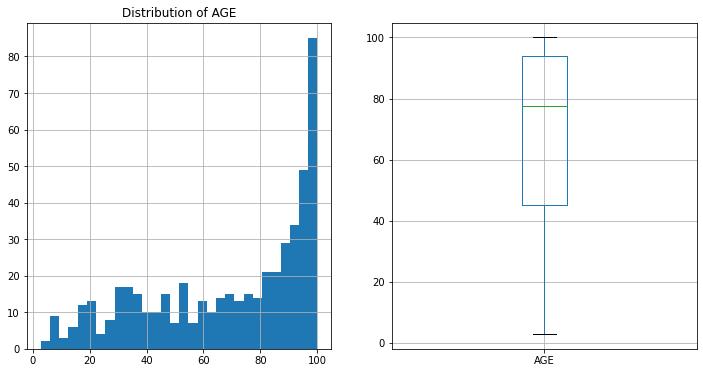

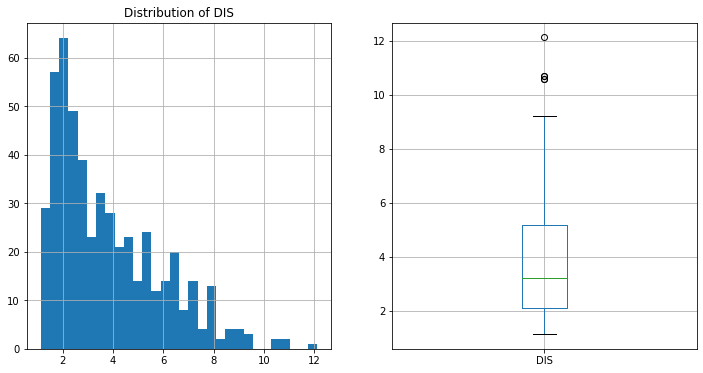

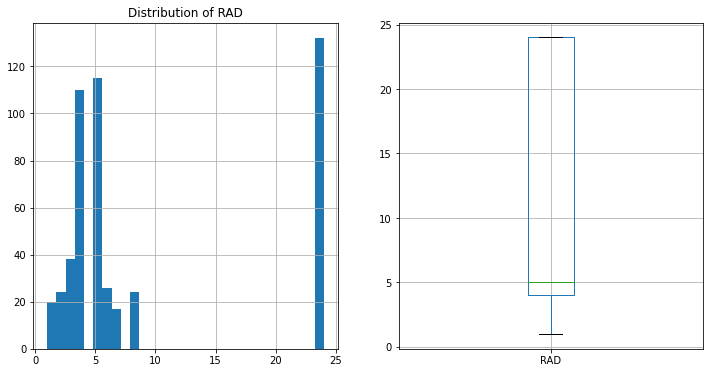

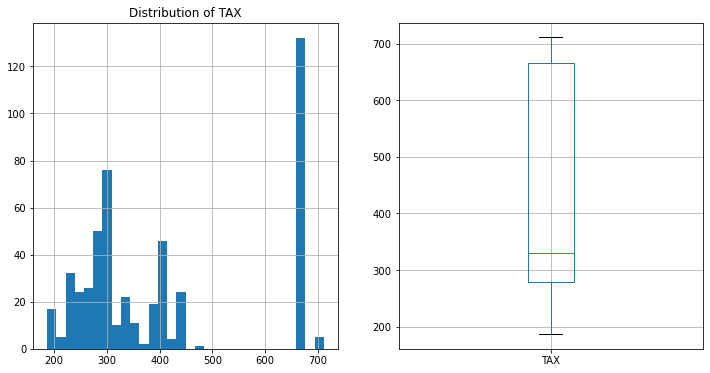

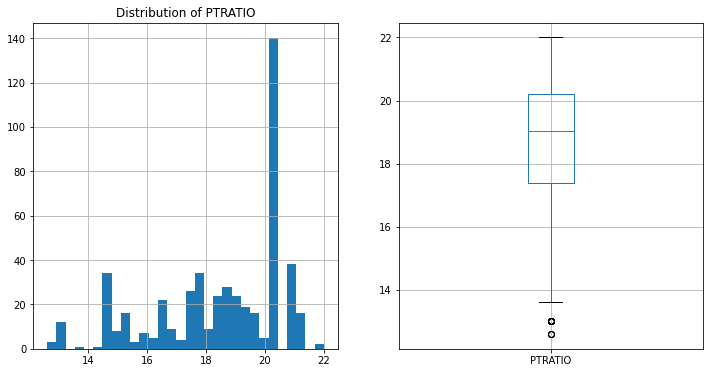

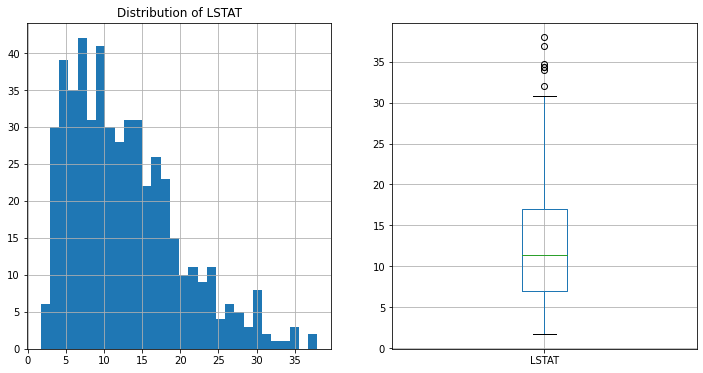

In [9]:
# we can build on this analysis by plotting the distribution and boxplots for each column

# we loop through all the columns
for col in boston_X.columns:
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    boston_X[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    boston_X.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

* A `histogram` tells is the number of times, or frequency, a value occurs within a `bin`, or bucket, that splits the data (and which we defined). A histogram shows the frequency with which values occur within each of these bins, and can tell us about the distribution of data. 
* A `boxplot` captures within the box the `interquartile range`, the range of values from Q1/25th percentile to Q3/75th percentile, and the median value. It also captures the `min` and `max` values of each feature.
* Together, these charts show us the distribution of values for each feature. We can start to make judgements about how to treat the data, for example whether we want to deal with outliers; or whether we want to normalize the data.

In [10]:
# we can now look at our target variable 
boston_y = boston.target

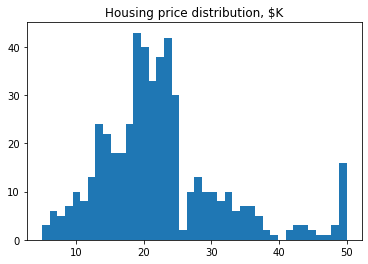

In [11]:
# we can plot a histogram in a slightly different way 
plt.hist(boston_y, bins = 40)
plt.title('Housing price distribution, $K')
plt.show()

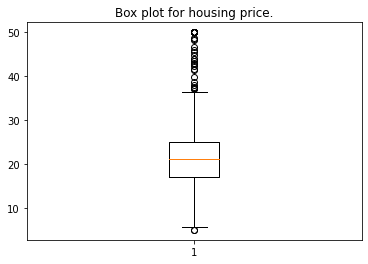

In [12]:
# and the same for the boxplot
plt.boxplot(boston_y)
plt.title('Box plot for housing price.')
plt.show()

/Users/preetham/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


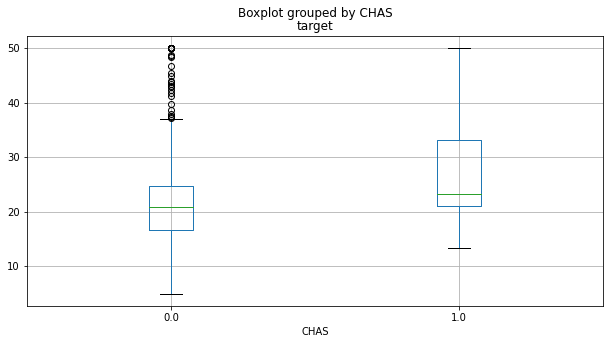

In [13]:
# another thing we can do is plot a boxplot of one variable against the target variable 
# it is interesting to see how house value distribution differs by CHAS, the categorical variable 

# here we create a grouped dataframe that includes the target variable
grouped_df = boston_X.copy()   # note we create a copy of the data here so that any changes don't impact the original data
grouped_df['target'] = boston_y.copy()

# we then plot it here
f, axes = plt.subplots(1, 1, figsize=(10, 5))   
grouped_df.boxplot(column='target', by = 'CHAS', ax = axes)
plt.show()

* The `interquartile range`for houses next to the river is higher than for those houses not next to the river, and the `min` and `max` values differ too.
* This suggests this could be an important variable for us to include in our model, given that as it differs, the target value distribution changes.

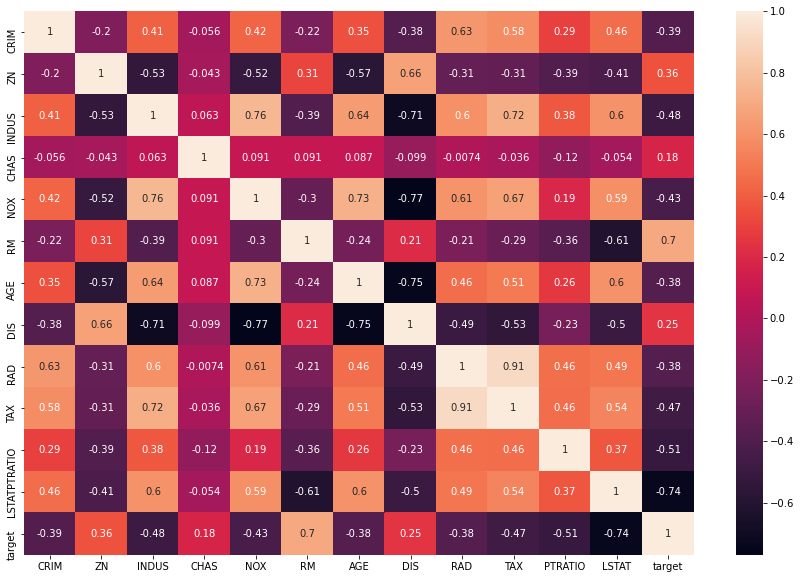

In [14]:
# we can extend this sort of analysis by creating a heatmap
# this shows the correlation between the features and target

# first we compute the correlation
corr = grouped_df.corr(method='pearson')
# and plot our figure size
plt.figure(figsize = (15, 10))
# and use seaborn to fill this figure with a heatmap
sns.heatmap(corr, annot = True)

* We will let you review this heatmap to see what features are important for modelling and why. 

In [15]:
# OPTIONAL: below is code that generate a pairplot using seaborn 
# look up what a pairplot is and see if you can interpret the output of the code below

#sns.pairplot(grouped_df)

#### Preprocess the data
* We proprocess the data to ensure it is a suitable state for modelling. The sort of things that we do to preprocess the data includes:
  * *Dealing with missing values*, where we identify what, if, any missing data we have and how to deal with it. For example, we may replace missing values with the mean value for that feature, or by the average of the neighbouring values. 
    * `pandas` has a number of options for filling in missing data that is worth exploring
    * We can also use `k-nearest neighbour`to help us predict what the missing values should be, or `sklearn Imputer` function (amongst other ways)
  * *Treat categorical values*, by converting them into a numerical representation that can be modelled.
    * There are a number of different ways to do this in `sklearn` and `pandas`
  * *Normalise the data*, for example by ensuring the data is, for example all on the scale (such as within two defined values); normally distributed; has a zero-mean, etc. This is sometimes necessary for the ML models to work, and can also help speed up the time it takes for the models to run.  
    * Again, `sklearn` and `pandas` have in-built functions to help you do this.
* In this notebook, we will look to remove `outliers`, which are values that might be erroneous and which can over-influence the model, and `normalize` the data

In [16]:
# lets start by removing outliers
 
# here we define the columns where we have identified there could be outliers
numeric_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
 
# this function can be used on any dataset to return a list of index values for the outliers 
def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = data[(data[col] > mean + 3*sd) | (data[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [17]:
# we call the function we just created on the boston dataset
boston_outliers = get_outliers(boston_X, numeric_columns)

In [18]:
# and drop those values from our feature and target values
boston_X = boston_X.drop(boston_outliers, axis = 0)
boston_y = pd.DataFrame(boston_y).drop(boston_outliers, axis = 0).values.ravel()

In [19]:
# we can check that this code has worked by looking at the shape of our data 
print (boston_X.shape)
print (boston_y.shape)

(469, 12)
(469,)


In [20]:
# we can also create a function to normalize our data
# first lets look at the data before normalisation
boston_X[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10


In [21]:
# this function loops through columns in a data set and defines a predefined scaler to each
def scale_numeric(data, numeric_columns, scaler):
    for col in numeric_columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [22]:
# we can now define the scaler we want to use and apply it to our dataset 

# a good exercise would be to research waht StandardScaler does - it is from the scikit learn library 
scaler = StandardScaler()
boston_X = scale_numeric(boston_X, numeric_columns, scaler)

In [23]:
# here we can see the result 
boston_X[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.548994,0.482440,-1.331520,0.0,-0.158204,0.480898,-0.143244,0.195980,-0.977034,-0.652970,-1.499062,-1.145501
1,-0.544792,-0.469807,-0.625009,0.0,-0.760481,0.230239,0.355341,0.653616,-0.860169,-0.977329,-0.320854,-0.522533
2,-0.544796,-0.469807,-0.625009,0.0,-0.760481,1.473769,-0.292456,0.653616,-0.860169,-0.977329,-0.320854,-1.287766
3,-0.543779,-0.469807,-1.350815,0.0,-0.856496,1.169397,-0.849271,1.224996,-0.743303,-1.097462,0.103300,-1.450995
4,-0.536435,-0.469807,-1.350815,0.0,-0.856496,1.411918,-0.543569,1.224996,-0.743303,-1.097462,0.103300,-1.093088
5,-0.544283,-0.469807,-1.350815,0.0,-0.856496,0.244888,-0.379800,1.224996,-0.743303,-1.097462,0.103300,-1.111058
6,-0.532583,0.191476,-0.506268,0.0,-0.280406,-0.435473,-0.092294,0.963229,-0.509573,-0.562870,-1.546191,-0.029848
7,-0.521320,0.191476,-0.506268,0.0,-0.280406,-0.175048,0.981302,1.166715,-0.509573,-0.562870,-1.546191,0.976486
8,-0.507968,0.191476,-0.506268,0.0,-0.280406,-1.055610,1.123236,1.235379,-0.509573,-0.562870,-1.546191,2.590813
9,-0.516217,0.191476,-0.506268,0.0,-0.280406,-0.448494,0.610093,1.501476,-0.509573,-0.562870,-1.546191,0.669494


## SECTION 2: Machine Learning Workflow

![alt text](https://github.com/DanRHowarth/Artificial-Intelligence-Cloud-and-Edge-Implementations/blob/master/Screenshot%202019-11-11%20at%2022.01.44.png?raw=true)

### 3. Split the data set 
* We will split our data so that we can train our model using a `training set` and test it on a `testing set`, which has previously not been seen by our model.
* We can do this in a variety of ways, from simply splitting the data 'manually' to using techniques such as cross-validation. Testing different approaches, including how much data to holdback for testing, is part of the trial and error of building a machine learning model. 

### 4. Choose the most appropriate baseline algorithm
* We will develop a basic, baseline model, to compare our more sophsiticated models with. 
* In the real world, this could be the current way things are done, even if this is currently not a machine learning method - it is often good to compare a complex model to something more basic to see what gains are really being achieved. 

### 5. Train and test your baseline model
* Given our baseline model and evaluation metric, we will train our model on our training data and test it on our testing data.

### 6. Chose quality evaluation metric(s)
* We will choose a method to assess our model, and use this to compare all the models we develop.  
* There are often a number of different metrics available, so it is important to consider what works best for a given problem and optimise the model for that metric.

### 7. Refine our dataset to improve the baseline model
* We can use a process called `feature engineering` to improve how our dataset represents the problem we are trying to solve (for example by putting more emphasis on certain aspects of the data).
* Feature engineering is a key part of machine learning. 

### 8. Test alternative models
* Once we have a good baseline, we can test alternative models that may perform better. We will compare them using the results from the test dataset. 

### 9. Choose the best model and optimize it's parameters
* Each model that we test will have a wide range of parameters that can be altered to change performance. 
* Once we have an idea of our best models, we can further refine our results by testing whether these parameters improve performance. 

####  Step 3: Split the data
* In order to train our model and see how well it performs, we need to split our data into training and testing sets.
* We can then train our model on the training set, and test how well it has generalised to the data on the test set.
* There are a number of options for how we can split the data, and for what proportion of our original data we set aside for the test set.

In [24]:
# a common way for splitting our dataset is using train_test_split 

# as an exercise, go to the scikit learn documentation to learn more about this function and the parameters available 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 5)

In [25]:
# get shape of test and training sets
print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  375
Number of features:  12


Test Set:
Number of datapoints:  94
Number of features:  12


###  Step 4: Choose a Baseline algorithm
* Building a model in `sklearn` involves:
  * defining / instantiating the model we want to use and its parameters (**Step 4**)
  * fitting the model we have developed to our training set (**Step 5**)
* We can then use the model to predict scores against our test set and assess how good it is
* To do this, we need to define an evaluation metric (**Step 6**). There are a number of different options, and they differ for both regression and classification problems. This score will be what we use to select our best model, and the best parameters. 
* We will take through these steps now. As you will see, the code required to implement these steps is minimal, thanks to different methods provided for us by  `sklearn`.



In [26]:
# we instantiate a model by storing it as a variable 
# this is the same process for most of the algorithms available in scikit learn (though you will need to import different libraries for different algorithms)

# linear regression is a fairly simple algorithm compared to more complicate regression options, so provides a good baseline
lm = LinearRegression()

### Step 5: Train and Test the Model 

In [27]:
# fitting the model to the data means to train our model on the data
# the fit function takes both the X and y variables of the training data 
lm.fit(X_train, Y_train)

LinearRegression()

In [28]:
# from this, we can generate a set of predictions on our unseen features, X_test
Y_pred = lm.predict(X_test)

###  Step 6: Choose an evaluation metric
* We then need to compare these predictions with the actual result and measure them in some way.
* This is where the selection of evaluation metric is important. For regression, we measure the distance between the predicted and actual answers in some way. The shorter the distance, the more correct the model is. 
* We cover three common metrics below:
  * `Mean Absolute Error`: which provides a mean score for all the predicted versus actual values as an absolute value 
  * `Means Squared Error`: which provides a mean score for all the predicted versus actual values as a square of the absolute value
  * `R2`: which we recommend you research as an exercise to grow your knowledge. WIkipedia and `sklearn` document are a great place to start!

In [29]:
def evaluate(Y_test, Y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Mean squared error:  14.054498954365052
Mean absolute error:  2.7689457931357535
R^2 :  0.7772335179847556


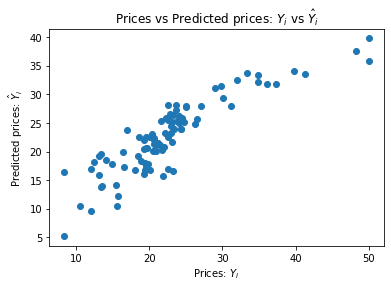

In [30]:
evaluate(Y_test, Y_pred)

In [31]:
# we can explore how metrics are dervied in a little more detail by looking at MAE
# here we will implement MAE using numpy, building it up step by step

# with MAE, we get the absolute values of the error - as you can see this is of the difference between the actual and predicted values
np.abs(Y_test - Y_pred)

array([1.41315575e+01, 2.89814207e+00, 5.51587343e+00, 8.30440252e-01,
       3.24814672e-01, 7.48417502e-01, 7.93048129e+00, 6.24943461e+00,
       3.70911373e+00, 3.40301311e+00, 1.09067045e+00, 8.45446293e-01,
       2.02032429e+00, 5.65283519e+00, 3.93859425e+00, 4.45945796e+00,
       1.48895175e+00, 1.74224903e+00, 7.75178395e-01, 1.22084735e+00,
       7.88804330e-01, 3.59669325e+00, 4.95846329e-01, 2.46884717e+00,
       2.94070872e+00, 1.40441273e-01, 7.02552144e-01, 7.75182825e+00,
       1.01342502e+00, 6.68812027e+00, 3.41746380e+00, 2.68045044e+00,
       2.08196922e+00, 4.32100803e+00, 2.48849607e+00, 5.08218663e+00,
       2.38621708e+00, 1.21278928e+00, 2.02511212e+00, 4.12143291e-01,
       2.96455082e-01, 4.14456642e-01, 2.10383739e-04, 1.34898797e+00,
       3.51372181e+00, 3.01208347e+00, 4.53303812e-01, 4.60385111e-01,
       7.43447384e-01, 6.13819474e+00, 2.07869960e+00, 4.86379726e+00,
       3.22627051e+00, 1.02284513e+01, 1.43955576e+00, 3.17514607e+00,
      

In [32]:
# we will then sum them up 
np.sum(np.abs(Y_test - Y_pred))

260.2809045547608

In [33]:
# then divide by the total number of predictions/actual values
# as you will see, we get to the same score implemented above 
np.sum(np.abs(Y_test - Y_pred))/len(Y_test)

2.7689457931357535

### Step 7: Refine our dataset
* This step allows us to add or modify features of the datatset. We might do this if, for example, some combination of features better represents the problems space and so is an indicator of the target variable. 
* Here, we create one additional feature as an example, but you should reflect on our EDA earlier and see whether there are other features that can be added to our dataset.

In [34]:
# here we are using pandas functionality to add a new column called LSTAT_2, which will feature values that are the square of LSTAT values
boston_X['LSTAT_2'] = boston_X['LSTAT'].map(lambda x: x**2)

In [35]:
# we can run our train_test_split function and see that we have an additional features
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(boston_X, boston_y, test_size = 0.2, random_state = 5)

print('Number of features after Step 7: ', X_train.shape[1])

Number of features after Step 7:  13


Mean squared error:  14.192521798416417
Mean absolute error:  2.9043998296716462
R^2 :  0.7750458296504438


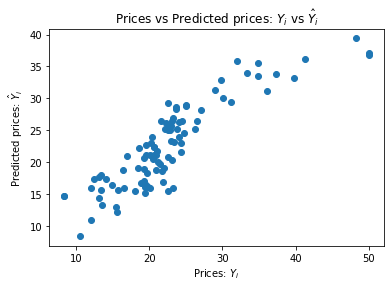

In [36]:
# we can now run the same code as before on our refined dataset to see if things have improved 
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

evaluate(Y_test, Y_pred)

### Step 8: Test Alternative Models
* Once we got a nice baseline model working for this dataset, we also can try something more sophisticated and rather different, e.g. RandomForest Regressor. So, let's do so and also evaluate the result.

In [37]:
# as you can see, its very similar code to instantiate the model
# we are able to pass in additional parameters as the model is created, so optionally you can view the documentation and play with these values

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
Y_pred = rfr.predict(X_test)

Mean squared error:  7.492868712765965
Mean absolute error:  1.8370957446808525
R^2 :  0.8812366055335926


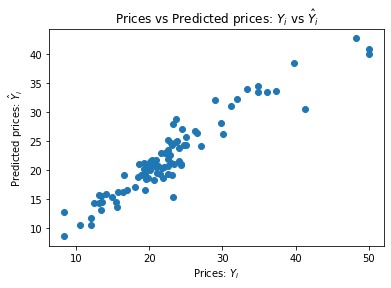

In [38]:
evaluate(Y_test, Y_pred)

### Step 9: Choose the best model and optimise its parameters
* We can see that we have improved our model as we have added features and trained new models.
* At the point that we feel comfortable with a good model, we can start to tune the parameters of the model.
* There are a number of ways to do this, and a common way is shown below

In [39]:
## grid search is a 'brute force' search, one that will explore every possible combination of parameters that you provide it

# we first define the parameters we want to search as a dictionary. Explore the documentation to what other options are avaiable
params = {'n_estimators': [100, 200], 'max_depth' : [2, 10, 20]}

# we then create a grid search object with our chosen model and paramters. We also use cross validation here - explored more in Day 2
grid = model_selection.GridSearchCV(rfr, params, cv=5)

In [40]:
# we fit our model to the data as before
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 10, 20], 'n_estimators': [100, 200]})

In [41]:
# one output of the grid search function is that we can get the best_estimator - the model and parameters that scored best on the training data - 
#  and save it as a new a model
best_model = grid.best_estimator_

Mean squared error:  7.628163620010344
Mean absolute error:  1.8300478723404254
R^2 :  0.8790921555166072


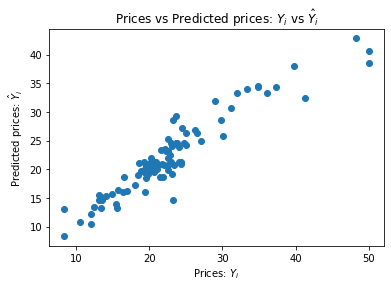

In [42]:
# and use it to predict and evaluate as before
Y_pred = best_model.predict(X_test)

evaluate(Y_test, Y_pred)

### NEXT STEPS: 
* As you can see, we have been able to try new models fairly easily and to see improvements in the evaluation metrics we have chosen. 
* If you have the opportunity, try the following:
  * implement new models using the code structure above. Look at the `sklearn` documentation for different options
  * explore the parameters of the different models 'by hand' (i.e. instantiate models with different parameters) and by using `GridSearchCV`
* Develop new features for the dataset by reflecting on the EDA and determining if they might better reflect the problem we are trying to solve

### * implement new models using the code structure above. Look at the `sklearn` documentation for different options

### Support Vector Regression model 

In [43]:
# We will try Epsilon-Support Vector Regression model from sklearn library
from sklearn.svm import SVR
svr = SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.0001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter= -1)
svr.fit(X_train, Y_train)
svr.score(X_test,Y_test)

0.7730230677456253

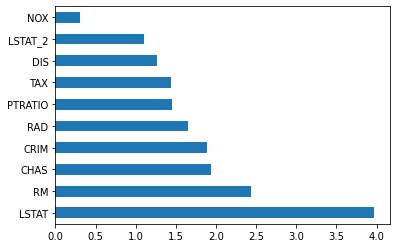

In [44]:
# See the top features which contributed the most in prediction
pd.Series(abs(svr.coef_[0]), index=X_test.columns).nlargest(10).plot(kind='barh')

Comment: The R Squared value is not good compared to above models

In [45]:
# * explore the parameters of the different models 'by hand' (i.e. instantiate models with different parameters) 
# we will change the tolerance to 0.1 and rerun the model
svr = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.1, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter= -1)
svr.fit(X_train, Y_train)
svr.score(X_test,Y_test)

0.7417384717957468

###  * explore the parameters of the different models  by using `GridSearchCV`

GridSearch Parameters: GridSearchCV(cv=5, estimator=SVR(tol=0.1),
             param_grid={'coef0': [3, 4, 5, 6], 'degree': [1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1], 'shrinking': [True, False]})
Best Model parameters: SVR(coef0=4, kernel='poly', shrinking=False, tol=0.1)
**Score on Test Data**
Mean squared error:  7.936779956101539
Mean absolute error:  2.0022381549107573
R^2 :  0.8742005278814493


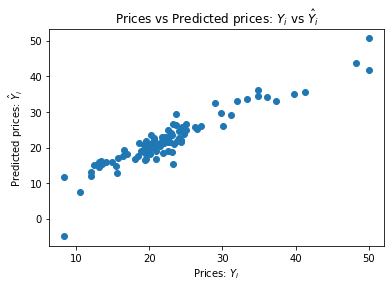

In [46]:
# we first define the parameters
params = {'kernel': ['linear','poly','rbf','sigmoid'], 'degree' : [1,2,3,4,5], 'gamma' : ['scale','auto'], 'coef0' : [3,4,5,6], 'shrinking' : [True, False], 'max_iter' : [-1]}

# we then create a grid search object with our chosen model and paramters. We also use cross validation here - explored more in Day 2
grid = model_selection.GridSearchCV(svr, params, cv=5)
# fit the model to the data
print('GridSearch Parameters:',grid.fit(X_train, Y_train))
# get the best score estimator
best_model = grid.best_estimator_
print('Best Model parameters:',best_model)
print('**Score on Test Data**')
# Predict and evaluate
Y_pred = best_model.predict(X_test)
evaluate(Y_test, Y_pred)

### GradientBoostingRegressor

In [47]:
# We will try GradientBoostingRegressor model from sklearn library
from sklearn.ensemble import GradientBoostingRegressor
xgr = GradientBoostingRegressor(random_state=42)
xgr.fit(X_train, Y_train)
xgr.score(X_test,Y_test)

0.9005984483846954

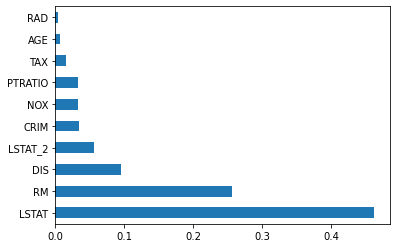

In [48]:
# See the top features which contributed the most in prediction
pd.Series(abs(xgr.feature_importances_), index=X_test.columns).nlargest(10).plot(kind='barh')

In [49]:
# * explore the parameters of the different models 'by hand' (i.e. instantiate models with different parameters) 
# we will change the tolerance to 0.01 and rerun the model
xgr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, tol=0.01, random_state=42)
xgr.fit(X_train, Y_train)
xgr.score(X_test,Y_test)

0.9005984483846954

In [50]:
# extract the default parameters used
xgr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.01,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

GridSearch Parameters: GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(random_state=42, tol=0.01),
             param_grid={'learning_rate': [0.1, 0.01], 'loss': ['ls'],
                         'n_estimators': [300, 600], 'tol': [0.1, 0.01]})
Best Model parameters: GradientBoostingRegressor(n_estimators=300, random_state=42, tol=0.1)
**Score on Test Data**
Mean squared error:  5.95515583212097
Mean absolute error:  1.7190174345861218
R^2 :  0.9056096472110707


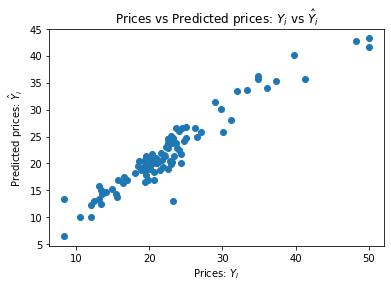

In [51]:
#disable warnings
import warnings
warnings.filterwarnings("ignore")
# we first define the parameters
params = {'loss': ['ls'], 'n_estimators' : [300,600], 'learning_rate': [0.1,0.01], 'tol' : [0.1, 0.01]}
# we then create a grid search object with our chosen model and paramters. We also use cross validation here - explored more in Day 2
grid = model_selection.GridSearchCV(xgr, params, cv=5)
# fit the model to the data
print('GridSearch Parameters:',grid.fit(X_train, Y_train))
# get the best score estimator
best_model = grid.best_estimator_
print('Best Model parameters:',best_model)
print('**Score on Test Data**')
# Predict and evaluate
Y_pred = best_model.predict(X_test)
evaluate(Y_test, Y_pred)

Comment: Slight improvement in RSquared compared to above

### * Develop new features for the dataset by reflecting on the EDA and determining if they might better reflect the problem we are trying to solve

In [63]:
# Lets create 10 bins for NOX nitric oxide severity 
boston_X_new = boston_X
boston_X_new = boston_X_new.drop(columns='NOX')
min = np.amin(boston_X.NOX)
print('min:',min)
max = np.amax(boston_X.NOX)
print('max:',max)
bins     = np.linspace(start=min, stop=max, num=10)
boston_X_new['NOX_bins'] = np.digitize(boston_X.NOX, bins, right=True)
boston_X_new

min: -1.4936879249338535
max: 2.748436032102847


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,LSTAT_2,NOX_bins
0,-0.548994,0.482440,-1.331520,0.0,0.480898,-0.143244,0.195980,-0.977034,-0.652970,-1.499062,-1.145501,1.312173,3
1,-0.544792,-0.469807,-0.625009,0.0,0.230239,0.355341,0.653616,-0.860169,-0.977329,-0.320854,-0.522533,0.273040,2
2,-0.544796,-0.469807,-0.625009,0.0,1.473769,-0.292456,0.653616,-0.860169,-0.977329,-0.320854,-1.287766,1.658340,2
3,-0.543779,-0.469807,-1.350815,0.0,1.169397,-0.849271,1.224996,-0.743303,-1.097462,0.103300,-1.450995,2.105387,2
4,-0.536435,-0.469807,-1.350815,0.0,1.411918,-0.543569,1.224996,-0.743303,-1.097462,0.103300,-1.093088,1.194841,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.537721,-0.469807,0.096344,0.0,0.510196,-0.001311,-0.644784,-0.977034,-0.791123,1.187252,-0.443164,0.196394,4
502,-0.541196,-0.469807,0.096344,0.0,-0.259686,0.275276,-0.744492,-0.977034,-0.791123,1.187252,-0.531518,0.282511,4
503,-0.538095,-0.469807,0.096344,0.0,1.133589,0.795698,-0.807103,-0.977034,-0.791123,1.187252,-1.046665,1.095507,4
504,-0.528319,-0.469807,0.096344,0.0,0.837355,0.733829,-0.691586,-0.977034,-0.791123,1.187252,-0.920873,0.848007,4


In [64]:
# lets verify the unique nox bins
boston_X_new['NOX_bins'].unique()

array([3, 2, 1, 4, 5, 9, 0, 8, 7, 6])

In [65]:
# lets re-split the boston dataframe which has binned NOX column
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(boston_X_new, boston_y, test_size = 0.2, random_state = 5)

In [66]:
#  test the gradient boost regressor using the binned nox column
xgr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300, tol=0.1, random_state=42)
xgr.fit(X_train, Y_train)
xgr.score(X_test,Y_test)

0.9062204270765755

Comment: Some improvement in R-Squared after binning the NOX values